In [114]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df=sns.load_dataset("exercise")
df.head()


,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  90 non-null     int64   
 1   id          90 non-null     int64   
 2   diet        90 non-null     category
 3   pulse       90 non-null     int64   
 4   time        90 non-null     category
 5   kind        90 non-null     category
dtypes: category(3), int64(3)
memory usage: 2.9 KB


In [116]:
print(f"Diet: {df["diet"].value_counts(normalize=True)}\n")
print(f"Time: {df["time"].value_counts(normalize=True)}\n")
print(f"Kind: {df["kind"].value_counts(normalize=True)}\n")

Diet: diet
no fat     0.5
low fat    0.5
Name: proportion, dtype: float64

Time: time
1 min     0.333333
15 min    0.333333
30 min    0.333333
Name: proportion, dtype: float64

Kind: kind
rest       0.333333
walking    0.333333
running    0.333333
Name: proportion, dtype: float64



In [117]:
df=df.drop(columns=["id", "Unnamed: 0"])
df.head()

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   diet    90 non-null     category
 1   pulse   90 non-null     int64   
 2   time    90 non-null     category
 3   kind    90 non-null     category
dtypes: category(3), int64(1)
memory usage: 1.5 KB


In [119]:
df=df.dropna()
df=df.drop_duplicates()
df

,diet,pulse,time,kind
0,low fat,85,1 min,rest
1,low fat,85,15 min,rest
2,low fat,88,30 min,rest
3,low fat,90,1 min,rest
4,low fat,92,15 min,rest
...,...,...,...,...
85,no fat,135,15 min,running
86,no fat,130,30 min,running
87,no fat,99,1 min,running
88,no fat,111,15 min,running


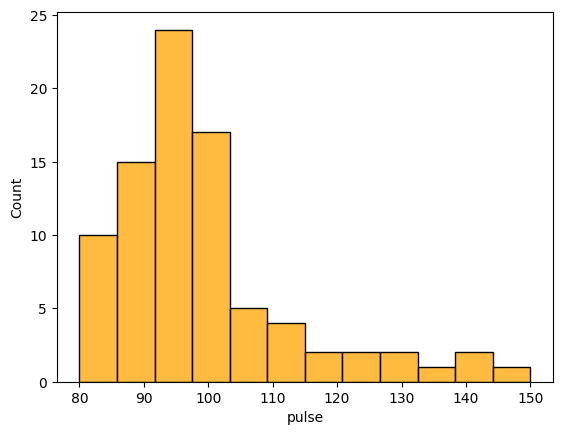

In [120]:
## Análisis exploratorio
## Univariado
sns.histplot(df["pulse"], color="orange")
plt.show()

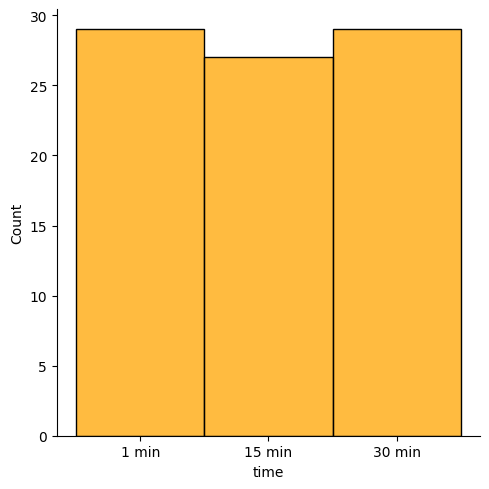

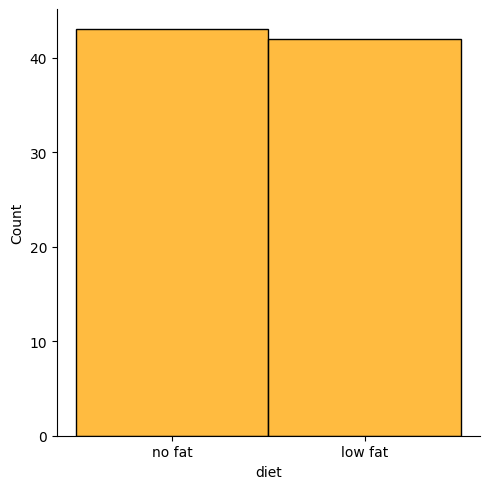

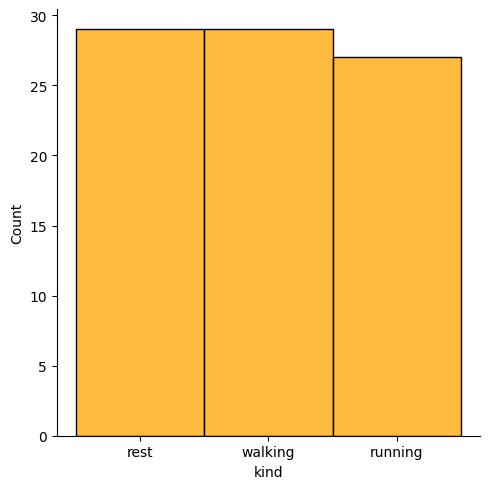

In [121]:
category=["time","diet","kind"]

for i in category:
    sns.displot(df[i], color="orange")
    plt.show()

In [122]:
#label encoding
df["kind"]=df["kind"].map({'rest':0, 'walking':1, 'running':2})
df["time"]=df["time"].map({'1 min':0, '15 min':1, '30 min':2})
df["diet"]=df["diet"].map({'no fat':0, 'low fat':1})
df

,diet,pulse,time,kind
0,1,85,0,0
1,1,85,1,0
2,1,88,2,0
3,1,90,0,0
4,1,92,1,0
...,...,...,...,...
85,0,135,1,2
86,0,130,2,2
87,0,99,0,2
88,0,111,1,2


In [123]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df[["pulse"]]=scaler.fit_transform(df[["pulse"]])
df

,diet,pulse,time,kind
0,1,-0.988462,0,0
1,1,-0.988462,1,0
2,1,-0.777711,2,0
3,1,-0.637211,0,0
4,1,-0.496710,1,0
...,...,...,...,...
85,0,2.524050,1,2
86,0,2.172799,2,2
87,0,-0.004959,0,2
88,0,0.838044,1,2
